## Noncentral chi-squared distribution(нецентральное хи-квадрат распределение)
https://en.wikipedia.org/wiki/Noncentral_chi-squared_distribution

In [1]:
import math
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
%matplotlib inline

 Создадим выборку с n=1000 и параметрами распределения k = 30 и λ = 1.5:

In [2]:
K, LAM = 30, 1.5
ncx2_rv = sts.ncx2(K, LAM)
sample_ncx = ncx2_rv.rvs(1000)

Строим гистограмму и теоретическую плотность распределения нашей случайной величины:

Text(0.5,0,u'$x$')

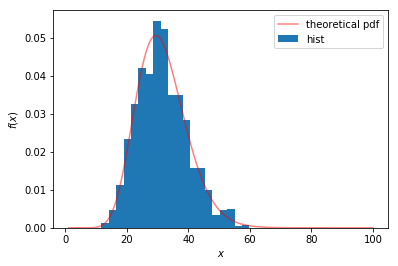

In [3]:
x = np.linspace(1,100,1000)
pdf = ncx2_rv.pdf(x)

plt.hist(sample_ncx, bins=20, normed=True, label='hist')
plt.plot(x, pdf, c='r', label='theoretical pdf', alpha=0.5)

plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Среднее и дисперсия согласно вики определены следующим образом:
 
$m$ = $k$ + $λ$

$\mathbb{b}^{2}$ = $ 2*(k+2*λ)$

Для нашего распределения с параметром k = 30 и λ = 1.5 математическое ожидание равно 31.5, дисперсия равна 66:

In [4]:
mu = K + LAM
var = 2*(K + 2*LAM)
sigma = math.sqrt(var)
mu, var

(31.5, 66.0)

Функция отображения распределения выборочного среднего нашей случайной величины для разных объёмах выборок:

In [5]:
def process(sample, mu,sigma,size):
    means = []
    for i in range(1000):
        sub_sample = sample[np.random.randint(0,1000,size)]
        means.append(np.mean(sub_sample))
    
    se = sigma/math.sqrt(size)
    norm_rv = sts.norm(mu,se)
    
    plt.hist(means,normed=True,label='actual')
    plt.plot(x,norm_rv.pdf(x),label='theoretical')
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')


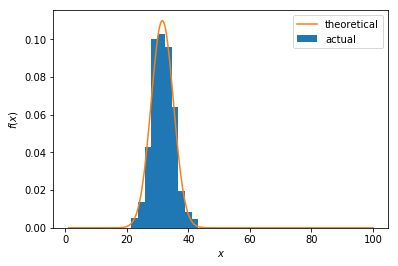

In [6]:
process(sample_ncx, mu,sigma,5)

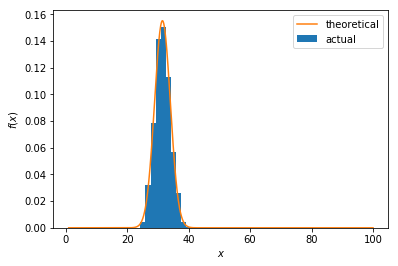

In [7]:
process(sample_ncx, mu,sigma,10)

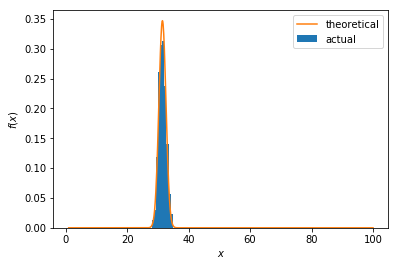

In [8]:
process(sample_ncx, mu,sigma,50)

## Выводы:

   В результате исследования можно заметить, что увеличение n "уплотняет" распределение выборочных средних, что говорит нам об увеличение точности оценки. В цифровом виде это можно выразить через доверительный интервал - видно, что с увеличением n он сужается.